In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(f"tf.__version__ = {tf.__version__}")

tf.__version__ = 2.3.1


In [2]:
NUM_CLASSES = 10
NUM_EPOCHS = 10

In [3]:
f_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = f_mnist.load_data()

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

print(f"train_images.shape = {train_images.shape}, train_labels.shape = {train_labels.shape}")
print(f"test_images.shape = {test_images.shape}, test_labels.shape = {test_labels.shape}")

train_images.shape = (60000, 28, 28), train_labels.shape = (60000,)
test_images.shape = (10000, 28, 28), test_labels.shape = (10000,)


In [6]:
model = keras.models.Sequential([
#     keras.layers.InputLayer(input_shape=(28, 28, 1)),
    keras.layers.Flatten(input_shape=(28, 28, 1)), 
    keras.layers.Dense(128, activation=tf.nn.relu), 
    keras.layers.Dense(NUM_CLASSES, activation=tf.nn.softmax)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [9]:
class EarlyStopCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.9:
            print("\nTarget reached, stop training")
            self.model.stop_training = True

In [10]:
model.fit(train_images, train_labels, epochs=NUM_EPOCHS, callbacks=[EarlyStopCallback()])

Epoch 1/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.4987 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 1s 782us/step - loss: 0.3778 - accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.3386 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 1s 699us/step - loss: 0.3124 - accuracy: 0.8863
Epoch 5/10
1875/1875 [==============================] - 1s 696us/step - loss: 0.2992 - accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.2800 - accuracy: 0.8979
Epoch 7/10
1847/1875 [============================>.] - ETA: 0s - loss: 0.2687 - accuracy: 0.9002
Target reached, stop training
1875/1875 [==============================] - 1s 799us/step - loss: 0.2690 - accuracy: 0.9001


In [11]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 475us/step - loss: 0.3554 - accuracy: 0.8717


[0.3554469347000122, 0.8716999888420105]

In [12]:
predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))

[2.2775685e-05 1.3791666e-09 4.9645994e-09 5.0181198e-10 1.6544643e-08
 1.7756483e-04 1.5934052e-07 3.0702946e-03 2.4397278e-07 9.9672890e-01]
9


In [13]:
test_image = test_images[0]
prediction = model.predict(test_image[np.newaxis])
print(prediction[0])
print(np.argmax(prediction[0]))

[2.2775685e-05 1.3791666e-09 4.9645994e-09 5.0181004e-10 1.6544611e-08
 1.7756467e-04 1.5934083e-07 3.0702916e-03 2.4397278e-07 9.9672890e-01]
9


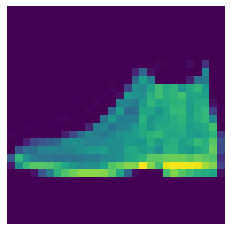

In [14]:
plt.figure()
plt.imshow(test_image)
plt.axis('off')
plt.show()